# 自我練習：資料集Water Potability
來源：
https://www.kaggle.com/adityakadiwal/water-potability

**使用Water Potability資料集建立DNN模型，以此預測水質的適飲性(Potability)**

背景：安全地飲用水對健康非常重要，也是健康政策的一大部分。地方已經指出若對供水和衛生設施的投資，可減少不利健康的影響和乾預措施的醫療保健成本，進而產生淨經濟效益。

該資料集 water_potability.csv 包含 3276 個不同水體的水質指標資料。

**欄位介紹：**
1. pH：水的酸鹼度，世界衛生組織(WHO)指出飲用水的pH值應界於6.5 ~ 8.5，而該資料集pH值範圍的是6.52 ~ 6.83 
2. Hardness：含有高濃度礦物質的硬水，又稱水的硬度。形成原因是因水滲流過由鈣、鎂組成的沉積物。
3. Solids：總溶解固體。在水中溶解的固體物質總量（包括溶解性碳酸氫離子、氯鹽、硫酸鹽、鈣、鎂、鈉與鉀等；揮發及非揮發性固體）。其濃度會影響飲用水之可口度。
4. Chloramines：氯胺。一般飲用水都會加氯胺。該資料集指出「飲用水中的氯含量達到每升4毫克(毫克/升或百萬分之4)被認為是安全的」。
5. Sulfate：硫酸鹽。在大多數的淡水中，它的一般範圍為 3 ~ 30 mg/L。
6. Conductivity：導電性。根據WHO標準，Electrical conductivity(EC)值不應超過400 μS/cm。
7. Organic_carbon：有機碳。Total Organic Carbon(TOC)是純水中有機化合物中碳總量的量度。根據美國環保署的規定，處理後的飲用水中TOC應小於 2 mg/L，用於處理的水源TOC則應小於 < 4 mg/L。
8. Trihalomethanes：三鹵甲烷。在飲用水氯化消毒過程中氯與水中的有機物所反應生成的主要揮發性鹵代烴類化合物。該資料集指出高達80ppm的Trihalomethanes被認為是安全的。
9. Turbidity：水質濁度。指水中懸浮物質的含量。Wondo Genet Campus的平均濁度值(0.98 NTU)低於WHO推薦的5.00 NTU。
10. Potability：適飲性。值 1 代表可飲用，0 則代表不可飲用。 

In [1]:
import pandas as pd
import numpy as np

# 匯入資料
data = pd.read_csv("data/water_potability/water_potability.csv")

print("資料筆數：{}".format(len(data)))
print(data.head())

資料筆數：3276
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


### 查看Water Quality資料集摘要

In [2]:
# 資料集摘要
data.info()

# 查看每一欄不同值的數量
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

**欄位「ph」、「Sulfate」、「Trihalomethanes」皆有空值(缺失值)**

### 繪圖-查看資料特徵Potability的0、1的數量比較

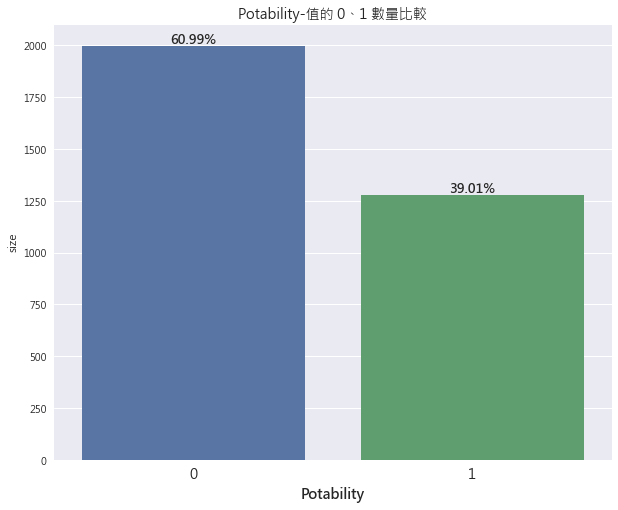

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# 設定中文字形
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False 

%matplotlib inline
plt.figure(figsize=(10,8))
count_Potability = data.groupby('Potability',as_index=False)["Potability"].agg([np.size,lambda x: np.size(x)/len(data)]).reset_index()
count_Potability.columns=['Potability','size','percentage']

ax = sns.barplot(x="Potability", y="size", data=count_Potability)
# 加上資料點
patches = ax.patches
for i in range(len(patches)):
    x_l = patches[i].get_x() + patches[i].get_width()/2
    y_l = patches[i].get_height()+10
    ax.annotate('{:.2%}'.format(count_Potability.loc[i,"percentage"]), (x_l, y_l), ha='center',size=13,weight='bold')

plt.xticks(fontsize=14)
plt.xlabel("Potability",fontsize=14,weight="bold")
plt.title("Potability-值的 0、1 數量比較",fontsize=14)

plt.show()

可以看出「Potability」的0、1 比例不平衡

### 繪圖-查看資料特徵的分布狀況

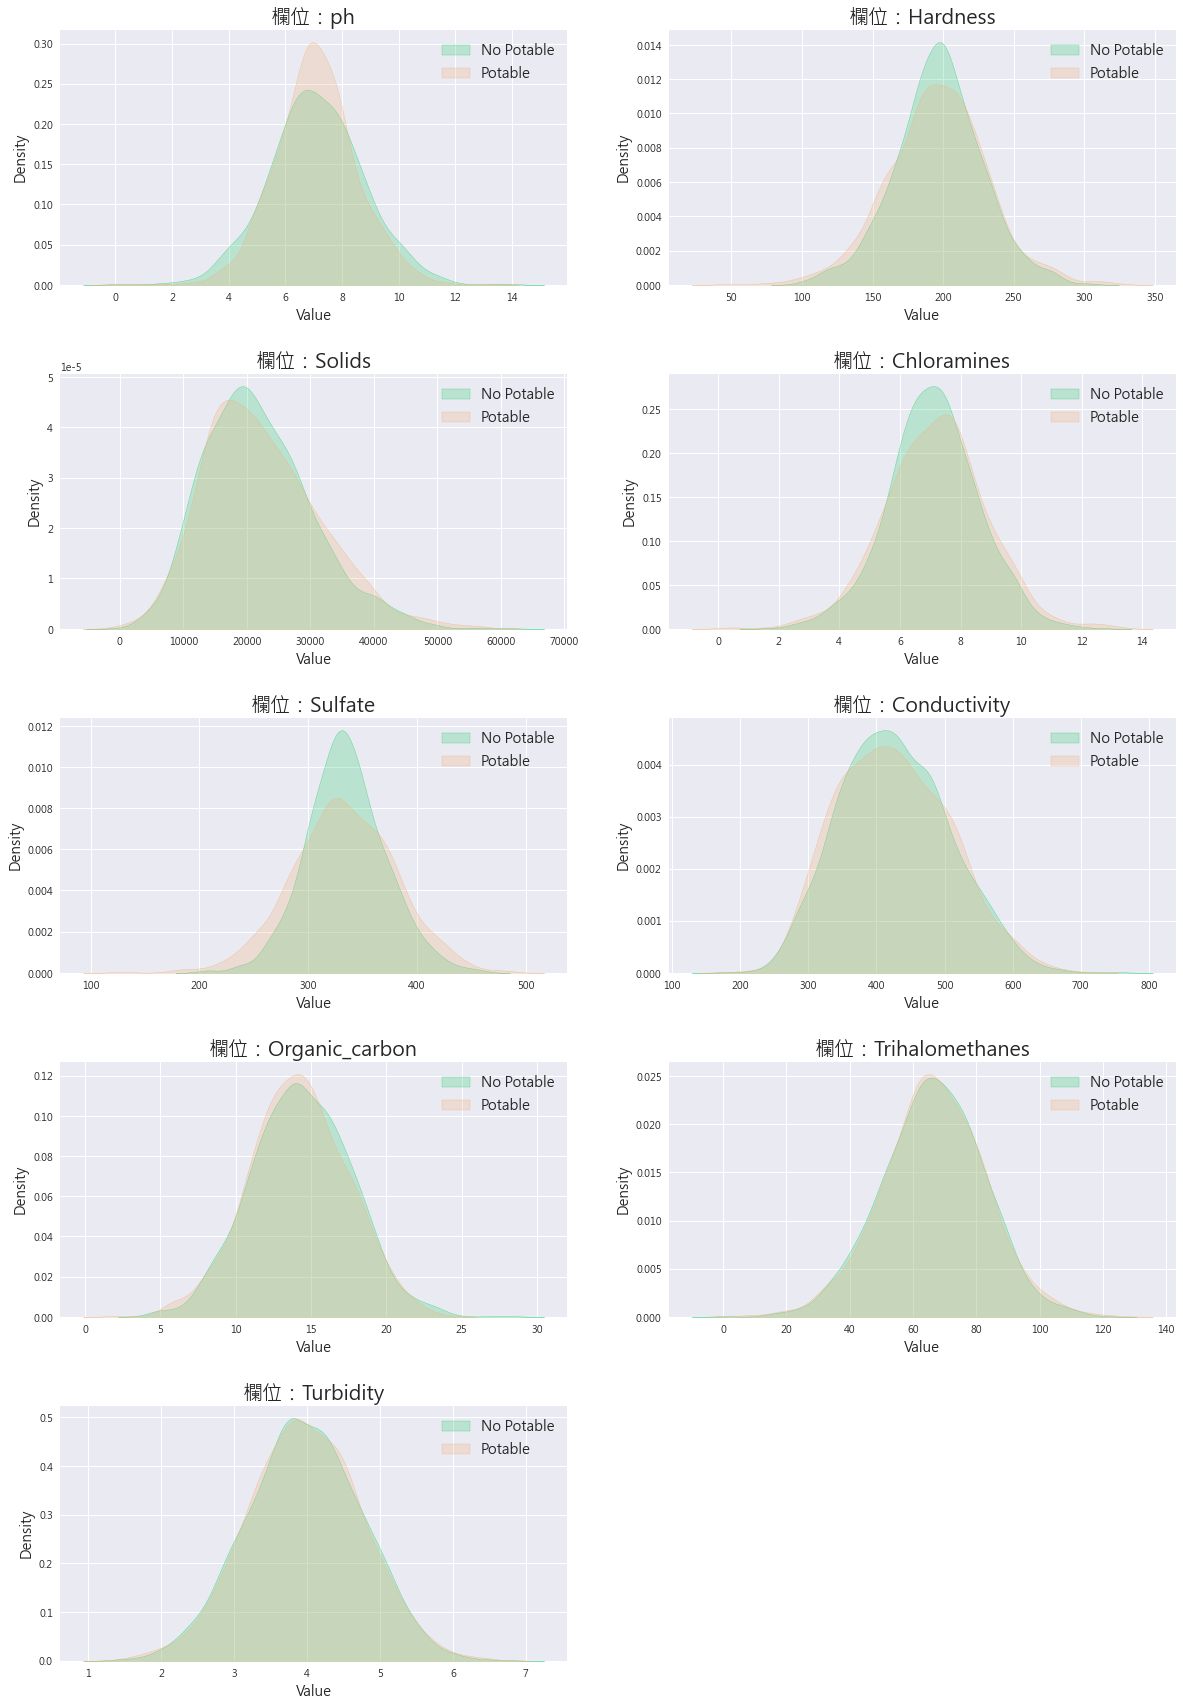

In [4]:
fig, axes = plt.subplots(5, 2, figsize=(20,30))
axes = axes.flatten()
for i in range(0,len(data.columns)-1):
    #plt.subplot(5,2,i+1)
    sns.kdeplot(data.loc[data["Potability"]==0,data.columns[i]], color="#2ECC71", fill=True, label="No Potable", ax = axes[i])
    sns.kdeplot(data.loc[data["Potability"]==1,data.columns[i]], color="#F0B27A", fill=True, label="Potable", ax = axes[i])
    
    axes[i].set_title("欄位："+data.columns[i],fontsize=20)
    axes[i].set_xlabel("Value",fontsize=14)
    axes[i].set_ylabel("Density",fontsize=14)
    axes[i].legend(fontsize=14)

# 刪除最後一個子圖
if (len(data.columns)-1)%2 !=0:
    fig.delaxes(axes[len(data.columns)-1])
    
plt.subplots_adjust(wspace=0.2, hspace=0.35)
plt.show()

可看出資料欄位分布大多接近常態分配

### 填補缺失值
將空值以「Potability」為分組的平均值填補

In [5]:
data["ph"] = data.groupby("Potability")["ph"].transform(lambda x: x.fillna(x.mean()))
data["Sulfate"] = data.groupby("Potability")["Sulfate"].transform(lambda x: x.fillna(x.mean()))
data["Trihalomethanes"] = data.groupby("Potability")["Trihalomethanes"].transform(lambda x: x.fillna(x.mean()))

In [6]:
# 填補後的資料集摘要
print("填補後的資料集摘要")

# 資料集摘要
data.info()

# 查看每一欄不同值的數量
data.nunique()

填補後的資料集摘要
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 2787
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2497
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3116
Turbidity          3276
Potability            2
dtype: int64

### 查看Water Quality資料集的統計摘要

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


## 建立DNN網路

由於「Potability」 0、1的比例不一樣，故Train和Test需按照比例切割

In [8]:
from sklearn.model_selection import train_test_split
#import pandas as pd
#import numpy as np

#data = pd.read_csv("data/WaterQuality/water_potability.csv")
X = data[["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
y = data['Potability']
seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

In [9]:
# 切割後 Potability 的比例
print("0:",np.size(y_train[y_train==0]) / len(y_train))
print("1:",np.size(y_train[y_train==1]) / len(y_train))

0: 0.6096816397732229
1: 0.39031836022677713


**使用最小值最大值(Min-Max Normalization)將訓練資料 "X_train" 標準化**

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 使用MinMaxscaler將資料縮放在0~1之間
scaler = MinMaxScaler()
scaler.fit(X)

X_train_scaled_data = scaler.fit_transform(X_train)

print(X_train_scaled_data)

[[0.82120421 0.46453351 0.19591356 ... 0.28636333 0.54628294 0.67218627]
 [0.41487419 0.50467136 0.70254791 ... 0.49222294 0.41015716 0.63699447]
 [0.57429601 0.63013484 0.10768717 ... 0.39103116 0.58801569 0.47957266]
 ...
 [0.4580505  0.54247666 0.52560939 ... 0.34272183 0.73393963 0.67387878]
 [0.50454621 0.26997307 0.28931132 ... 0.39232719 0.23308423 0.36790816]
 [0.4734591  0.5890192  0.29124084 ... 0.3609607  0.62633108 0.36968777]]


將 Y 轉成 One-hot encoding

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#將 Y 轉成 One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
model = Sequential()
#輸入層
model.add(Dense(100,input_dim=9, activation="relu"))
#隱藏層
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))

# 輸出層
model.add(Dense(2, activation="softmax"))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,302
Trainable params: 11,302
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])

history = model.fit(X_train_scaled_data, y_train, validation_split=0.2,
                   epochs=20, batch_size=64, verbose=2)

Train on 1834 samples, validate on 459 samples
Epoch 1/20
1834/1834 - 1s - loss: 0.6775 - accuracy: 0.5981 - val_loss: 0.6776 - val_accuracy: 0.5904
Epoch 2/20
1834/1834 - 0s - loss: 0.6683 - accuracy: 0.6150 - val_loss: 0.6764 - val_accuracy: 0.5904
Epoch 3/20
1834/1834 - 0s - loss: 0.6700 - accuracy: 0.6140 - val_loss: 0.6779 - val_accuracy: 0.5904
Epoch 4/20
1834/1834 - 0s - loss: 0.6653 - accuracy: 0.6134 - val_loss: 0.6778 - val_accuracy: 0.5904
Epoch 5/20
1834/1834 - 0s - loss: 0.6671 - accuracy: 0.6150 - val_loss: 0.6752 - val_accuracy: 0.5904
Epoch 6/20
1834/1834 - 0s - loss: 0.6621 - accuracy: 0.6145 - val_loss: 0.6744 - val_accuracy: 0.5904
Epoch 7/20
1834/1834 - 0s - loss: 0.6614 - accuracy: 0.6200 - val_loss: 0.6785 - val_accuracy: 0.5904
Epoch 8/20
1834/1834 - 0s - loss: 0.6641 - accuracy: 0.6161 - val_loss: 0.6680 - val_accuracy: 0.5926
Epoch 9/20
1834/1834 - 0s - loss: 0.6606 - accuracy: 0.6243 - val_loss: 0.6653 - val_accuracy: 0.5948
Epoch 10/20
1834/1834 - 0s - loss: 

### 評估模型

In [15]:
loss, accuracy = model.evaluate(X_train_scaled_data, y_train)

# 訓練資料集準確度
print("訓練資料集準確率：{}".format(accuracy))

# 測試資料也要標準化
X_test_scaled_data = scaler.fit_transform(X_test)

loss, accuracy = model.evaluate(X_test_scaled_data, y_test)
# 測試資料集準確度
print("測試資料集準確率：{}".format(accuracy))

2293/2293 [==============================] - 0s 34us/sample - loss: 0.6315 - accuracy: 0.6777
訓練資料集準確率：0.6777147650718689
983/983 [==============================] - 0s 35us/sample - loss: 0.6432 - accuracy: 0.6399
測試資料集準確率：0.6398779153823853


### 儲存模型

In [16]:
import joblib

# 儲存模型
model.save('WaterQuality.h5')

# 儲存MinMaxScaler
joblib.dump(scaler, "scaler.save")

['scaler.save']

### 訓練和驗證損失的比較圖

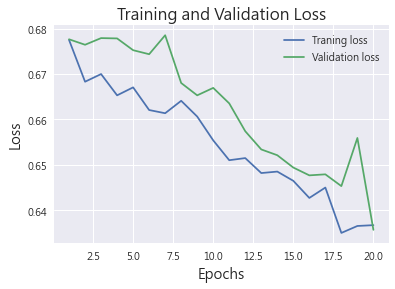

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# 設定中文字形
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

# 訓練損失
train_loss = history.history["loss"]

# 多少個 epochs 就有多少個loss
epochs = range(1,len(train_loss)+1)

# 驗證損失
val_loss = history.history["val_loss"]

%matplotlib inline
plt.figure()
sns.lineplot(x=epochs, y=train_loss, label="Traning loss")
sns.lineplot(x=epochs, y=val_loss, label="Validation loss")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.title("Training and Validation Loss", fontsize=16)
plt.legend()
plt.show()

### 訓練和驗證準確率的比較圖

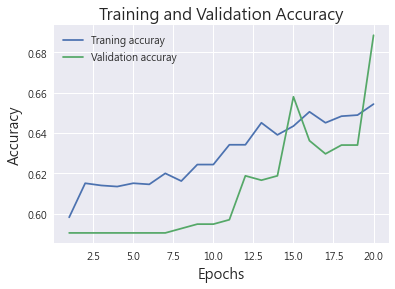

In [18]:
# 訓練和驗證準確率
train_acc = history.history["accuracy"]
epochs = range(1,len(train_acc)+1)
val_acc = history.history["val_accuracy"]

%matplotlib inline
plt.figure()
sns.lineplot(x=epochs, y=train_acc, label="Traning accuray")
sns.lineplot(x=epochs, y=val_acc, label="Validation accuray")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.title("Training and Validation Accuracy", fontsize=16)
plt.legend()
plt.show()

**能看出模型訓練的過程良好，準確率(Accuracy)是上升趨勢**

### 混淆矩陣

In [19]:
X = data[["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
y = data['Potability']
seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3)

X_test_scaled_data = scaler.fit_transform(X_test)

Y_pred = model.predict(X_test_scaled_data)
Y_pred = np.argmax(Y_pred,axis=1)
print("Y_pred：")
print(Y_pred[:10])
print("Y_pred的數量：",len(Y_pred))

tb = pd.crosstab(y_test.astype(int), Y_pred.astype(int),
                rownames=["Potability_label"], colnames=["predict"])

Y_pred：
[0 0 1 0 0 1 0 0 0 0]
Y_pred的數量： 983


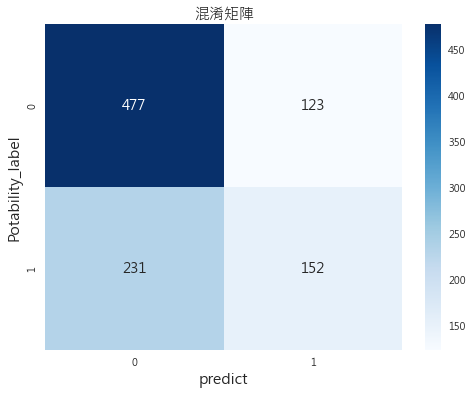

In [20]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.heatmap(tb, annot=True, cmap="Blues", fmt="d",annot_kws={"fontsize":14})
plt.xlabel("predict",fontsize=15)
plt.ylabel("Potability_label",fontsize=15)
plt.title("混淆矩陣", fontsize=15)
plt.show()

### 篩選出分類錯誤的資料

In [21]:
df = pd.DataFrame({"Potability_label":y_test, "predict":Y_pred})
df = df[y_test != Y_pred] # 找出哪幾個資料是 Potability_label和 predict 不一致的
print(df)

      Potability_label  predict
3171                 1        0
3211                 1        0
489                  0        1
2761                 1        0
2055                 0        1
...                ...      ...
1481                 1        0
2998                 0        1
2705                 0        1
2978                 0        1
296                  1        0

[354 rows x 2 columns]


### 繪製ROC圖

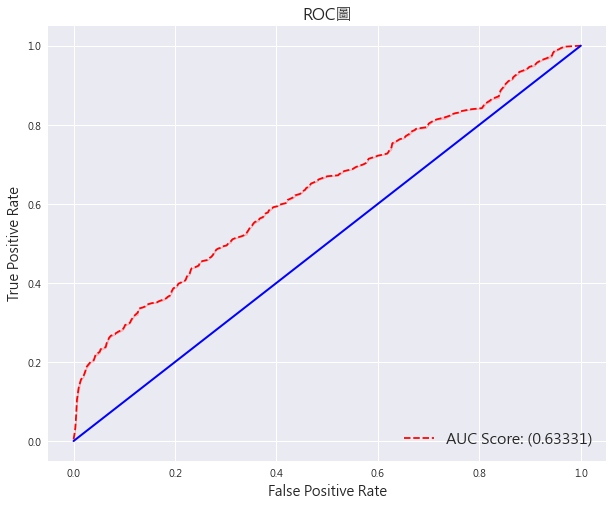

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
Y_pred_prob = model.predict_proba(X_test_scaled_data)
fpr, tpr, thresh = roc_curve(y_test, Y_pred_prob[:, 1], pos_label=1)
AUC_score = roc_auc_score(y_test, Y_pred_prob[:, 1])

%matplotlib inline
plt.figure(figsize=(10,8))
sns.lineplot(x=fpr, y=tpr, linestyle="--", color="red", label="AUC Score: (%0.5f)" % AUC_score)
sns.lineplot(x=[0, 1],y=[0, 1], color="blue", lw=2, linestyle="-")

plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC圖",fontsize=16)
plt.legend(loc="lower right", prop={"size": 15})
plt.show()